## Assignment 4

This assignment asks you to use resources at hand to apply module 6 - Linear Regression to several sets of data.

## Learning Outcomes

- Exploratory analysis for regression
- Understand difference between linear and non-linear models
- Carry out OLS regression model
- Evaluate model


**Question 1**

* For each data set in Assignment4_linear_regression_data.xlsx:

- Create a scatter plot and visually decide if a linear model is appropriate (a matrix scatter plot will would be most efficient).

* If the relation is not linear, transform the data accordingly. 
 - Try logarithm, exponential, square root, square, etc., for Y and/or X until you see a linear relation.  You only need to report what is the transformation chosen, not all the attempts. 
 Note:  most of the time, you can guess visually. A systematic way is to create a matrix scatter plot of the different transformations.  A generic way we did not cover is to use a Box-Cox transformation. 
 
* Create an OLS model for the original and transformed data if required. 
 - Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate. 

 - Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
 - If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)


The output of the assignment should be: 

- OLS full report for the original and transformed data if appropriate (only two datasets should need transformation).

- A short comment on the validity of the linear assumptions for the original and transformed data set when appropriate (it should not need to be longer than a couple of sentences).

- An interpretation of the slope and intercept in relation to the original data, i.e. if the model is linear [intercept value] is the expected value when the independent variable is zero, etc.).  If the model is not linear, you need to transform the equation back to its original form.  

Check out the following if you need further guidance:
http://www.bzst.com/2009/09/interpreting-log-transformed-variables.html

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/

https://stats.idre.ucla.edu/sas/faq/how-can-i-interpret-log-transformed-variables-in-terms-of-percent-change-in-linear-regression/

https://stats.stackexchange.com/questions/266722/interpretation-of-linear-regression-results-where-dependent-variable-is-transfor

- If the dataset have outliers, determine if the outlier have leverage or not by comparing the OLS with and without the outlier.


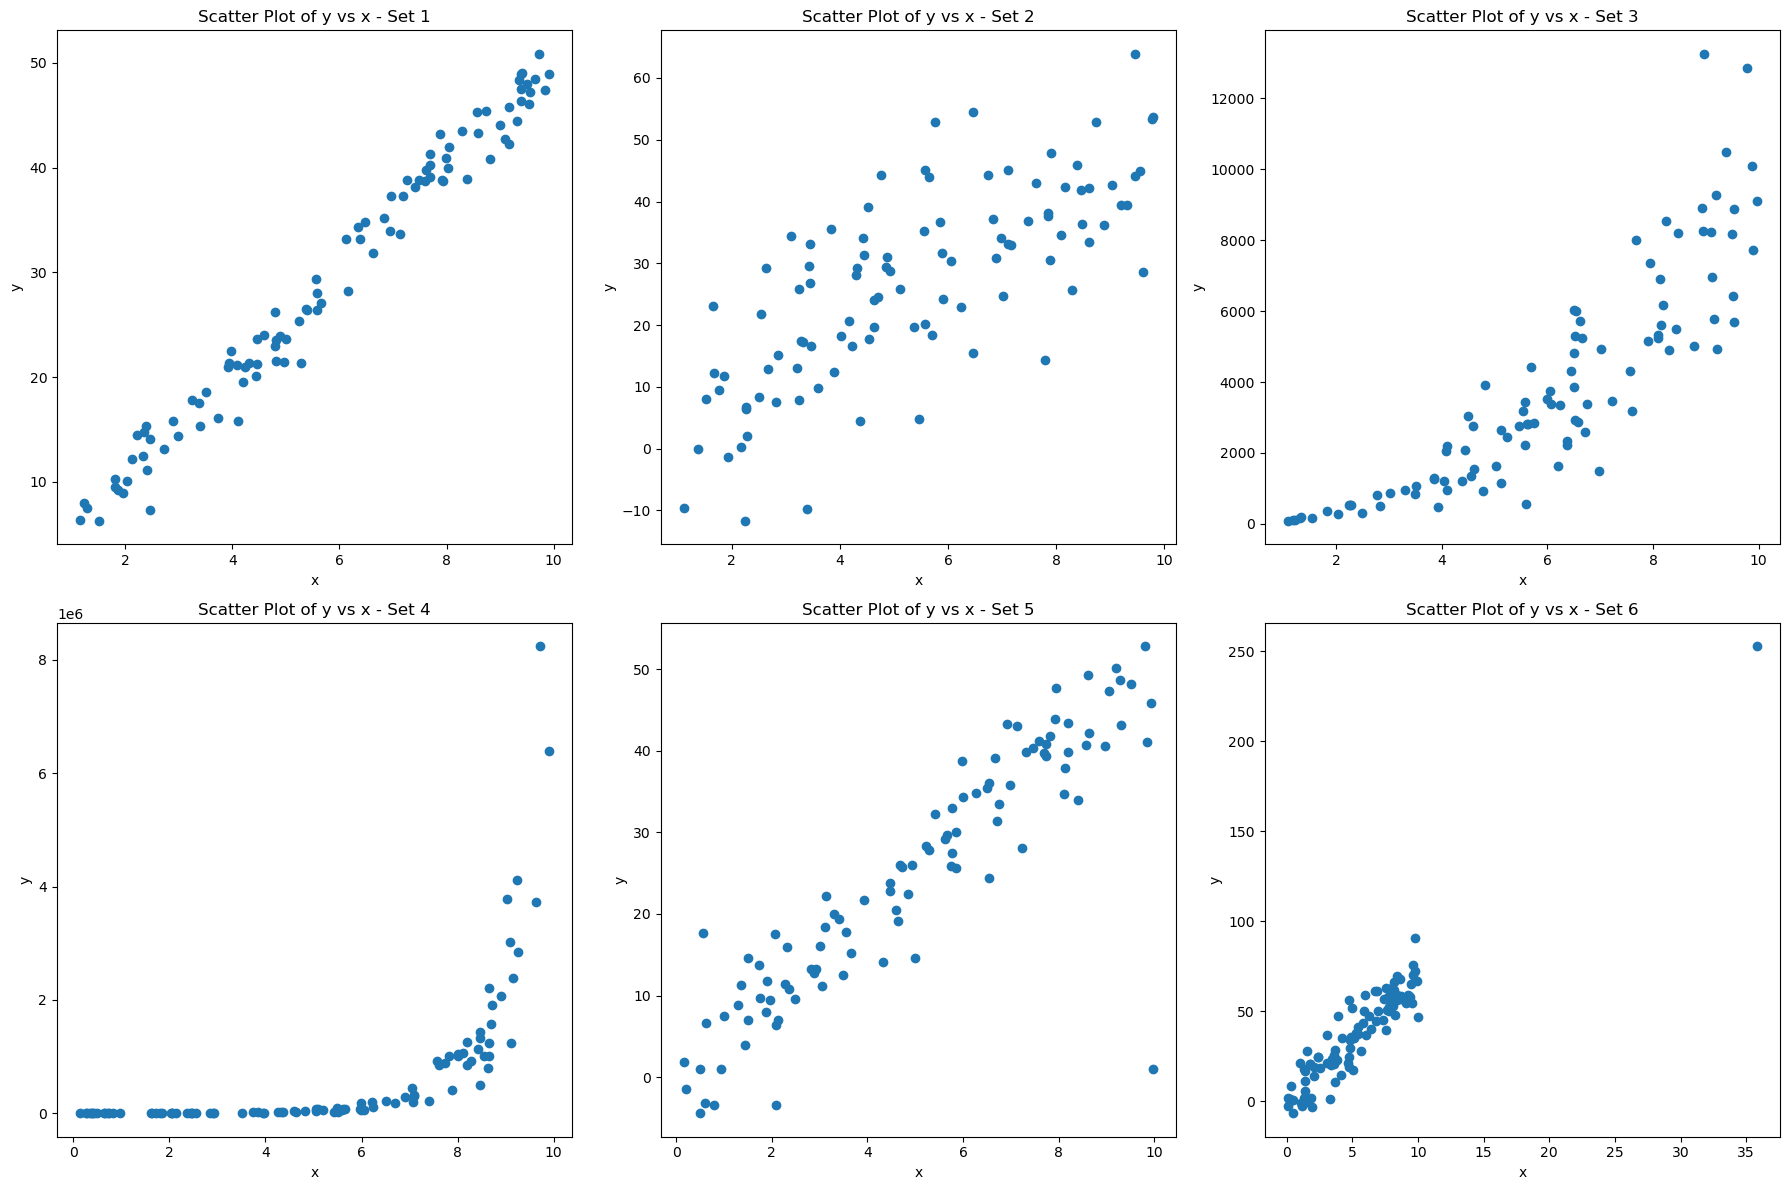

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot

xls = pd.ExcelFile('Assignment4_linear_regresion_data.xlsx')
sheet_names = xls.sheet_names
fig, ax = plt.subplots(2, 3, figsize=(18, 12))
ax = ax.flatten()
for i, sheet in enumerate(sheet_names):
    data = pd.read_excel(xls, sheet_name=sheet)
    data.columns = [col.lower() for col in data.columns] # Standardizing column names to lowercase    
    # scatter plot for all 6 sets
    ax[i].scatter(data['x'], data['y'])
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].set_title(f'Scatter Plot of y vs x - {sheet}')
plt.tight_layout()
plt.show()


Visual Inspection

Linear Sets:

    Set 1: Strong linear trend, suitable for a linear model.
    Set 2: Displays a weak, scattered linear trend but may require transformation to improve the fit.
    Set 5: Moderate linear relationship with some scatter, but a linear model would still work.
    Set 6: Initially appears linear but has a significant outlier that may affect the linear model.

Non-linear Sets:
    
    Set 3: Shows a clear non-linear (exponential-like) trend.
    Set 4: Exhibits a very strong non-linear trend with an exponential increase.




## Set 1

In [2]:
df1 = pd.read_excel(xls, 'Set 1')
df1.head(5)

,y,x
0,38.858144,7.266278
1,40.891148,7.985333
2,48.971648,9.387120
3,46.410124,9.382849
4,25.333391,5.240903


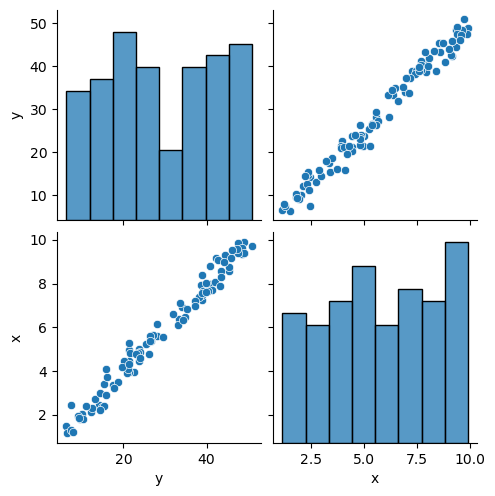

In [3]:
sns.pairplot(df1)

This displays fairly strong positive correlation, so no need to transform the data

In [4]:
# Regression model
df1_m = sm.ols('y ~ x', data = df1).fit()
df1_m.params

Intercept    0.238070
x            4.984259
dtype: float64

- We have determined the intercept to be approximately 0.2381 and the slope to be around 4.984.
- Therefore, the equation for predicting y can be expressed as: y = 0.2381 + 4.984 * x

In [5]:
df1_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           4.47e-84
Time:                        21:10:46   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.613      -0.693       1.169
x              4.9843      0.074     67.669      0.000       4.838       5.130
==============================================================================
Omnibus:                        4.971   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.783
Skew:                          -0.536   Prob(JB):                       0.0915
Kurtosis:                       2.988   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assumptions Validity for Set 1
- Linearity: The high R2 value suggests that the relationship between x and y is indeed linear.
- Normality of Residuals: Both the Omnibus and Jarque-Bera tests indicate that the residuals are approximately normally distributed.
- Homoscedasticity: No indication of heteroscedasticity is observed based on the diagnostics.
- No Autocorrelation: The Durbin-Watson statistic being close to 2 confirms that there is no autocorrelation in the residuals.

The regression model fits the data well, explaining approximately 97.9% of the variance.
The slope is highly significant, indicating a strong positive relationship between x and y.
The intercept is not statistically significant, so it may not have practical relevance.

In [6]:
# Evaluating the OLS assumptions
intercept, slope = df1_m.params
df1['y_est']= intercept + slope *df1.x

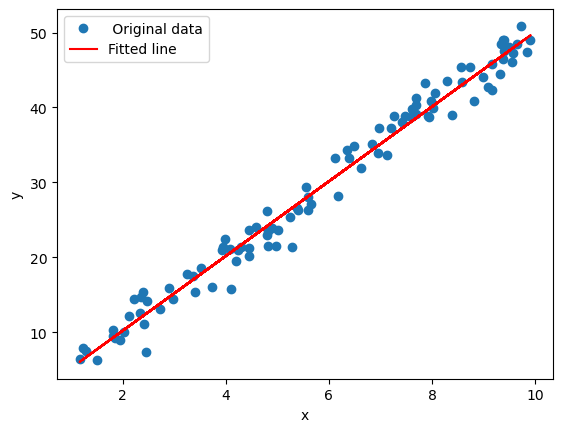

In [7]:
# Plot the estimates along with the actual observations

plt.plot(df1.x, df1.y, 'o', label=' Original data')
plt.xlabel('x')
plt.ylabel('y')

# Plot regression line 

plt.plot(df1.x, df1.y_est, 'r-', label ='Fitted line')
plt.legend()
plt.show()

count    1.000000e+02
mean     5.782042e-15
std      1.908727e+00
min     -3.763343e+00
25%     -1.472735e+00
50%     -2.630865e-01
75%      1.133296e+00
max      5.254912e+00
Name: Residuals, dtype: float64

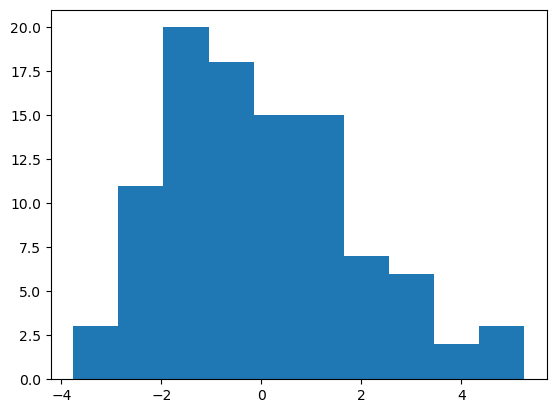

In [8]:
#Calculate the residuals
df1['Residuals'] = df1['y_est']- df1['y']

#Plot a histogram of the residuals
df1_residual_hist = plt.hist(df1['Residuals'])

df1['Residuals'].describe()

Residuals seem to be distributed normally. The prediction error ranges from -3.76 to 5.25. Residuals mean and median are close to 0. Taken together the model seems to be valid


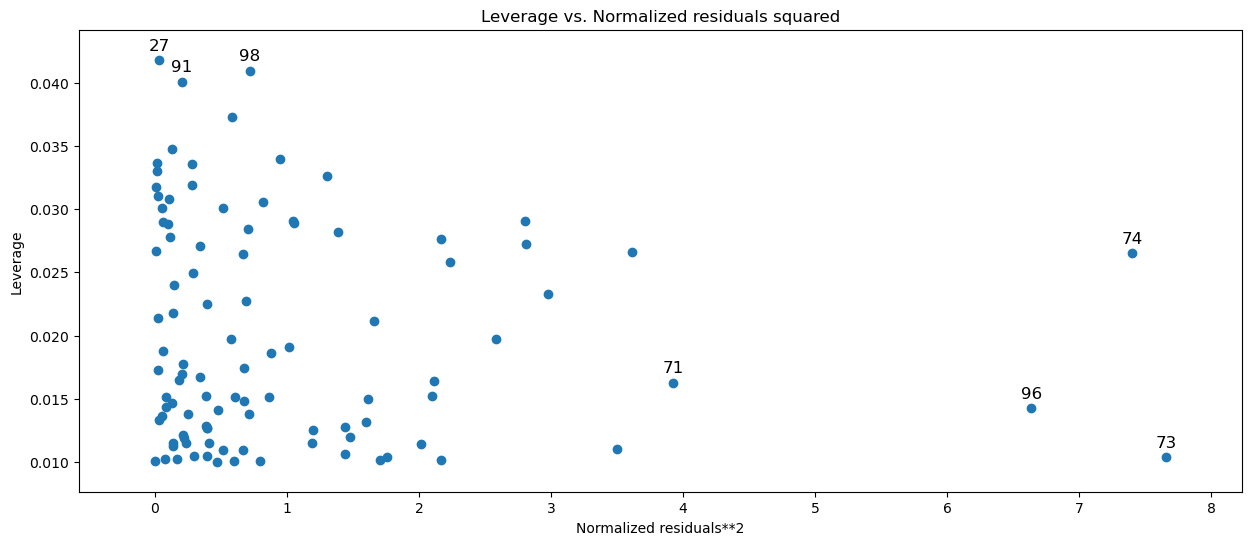

In [9]:
fig,ax = plt.subplots(figsize=(15,6))
fig = plot_leverage_resid2(df1_m, ax=ax)


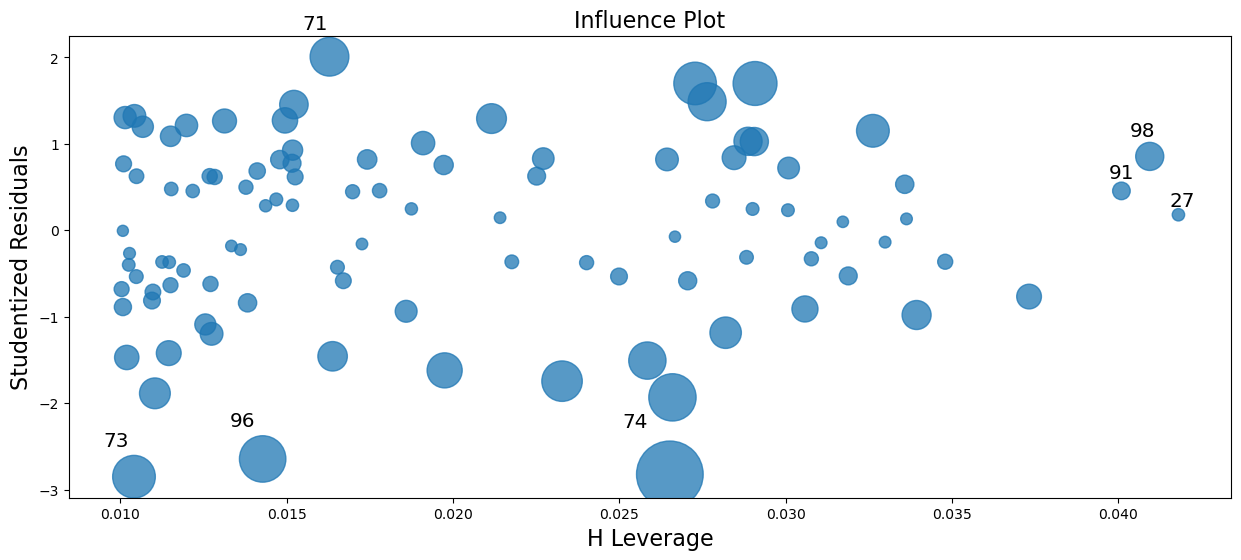

In [10]:
fig,ax = plt.subplots(figsize= (15,6))
fig = influence_plot(df1_m, ax=ax)

Point 73 combines both high residuals and moderate leverage, making it highly influential.

## Set 2

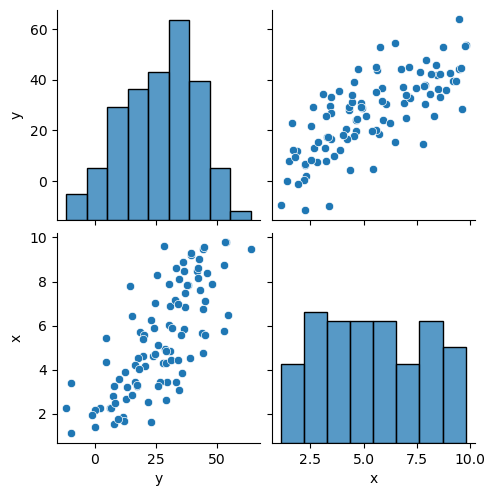

In [11]:
df2 = pd.read_excel(xls, 'Set 2')
sns.pairplot(df2)

Y is pretty normally distributed so no need to transform the data


In [12]:
df2_m = sm.ols('y~x', data = df2).fit()
df2_m.params

Intercept    1.095552
x            4.777354
dtype: float64

We have estimated the intercept to be approx 1.096 and the slope to be 4.777, thus the equation for predicting y = 1.096 + 4.777 * x


In [13]:
df2_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           6.11e-19
Time:                        21:10:47   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0956      2.547      0.430      0.668      -3.958       6.149
x              4.7774      0.432     11.062      0.000       3.920       5.634
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.079
Skew:                          -0.065   Prob(JB):                        0.961
Kurtosis:                       3.045   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assumptions Validity for Set 2
- Linearity: The R2 value of 0.555 suggests a moderate linear relationship between x and y.
- Normality of Residuals: Both the Omnibus and Jarque-Bera tests indicate that the residuals are approximately normally distributed.
- Homoscedasticity: No indication of heteroscedasticity is observed based on the diagnostic tests.
- No Autocorrelation: The Durbin-Watson statistic being close to 2 confirms that there is no autocorrelation in the residuals.


In [14]:
intercept, slope= df2_m.params
df2['y_est'] = intercept +slope* df2.x

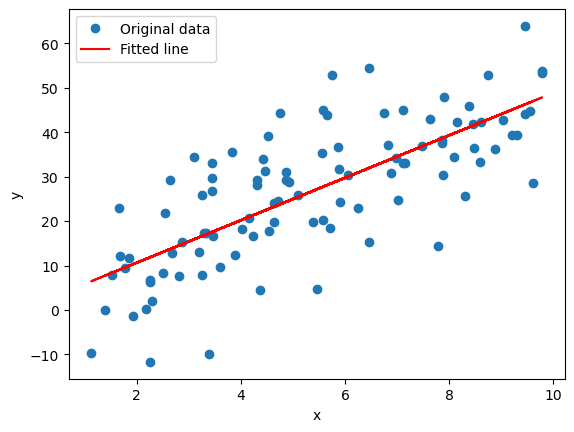

In [15]:
#Lets plot the estimates along with the actual observations
plt.plot(df2.x, df2.y, 'o', label = 'Original data')
plt.xlabel('x')
plt.ylabel('y')

#Plot regression line 
plt.plot(df2.x, df2.y_est, 'r-', label = 'Fitted line')
plt.legend()
plt.show()

count    1.000000e+02
mean    -1.332268e-14
std      1.041688e+01
min     -2.427189e+01
25%     -6.825796e+00
50%      3.255999e-01
75%      6.370633e+00
max      2.713100e+01
Name: Residuals, dtype: float64

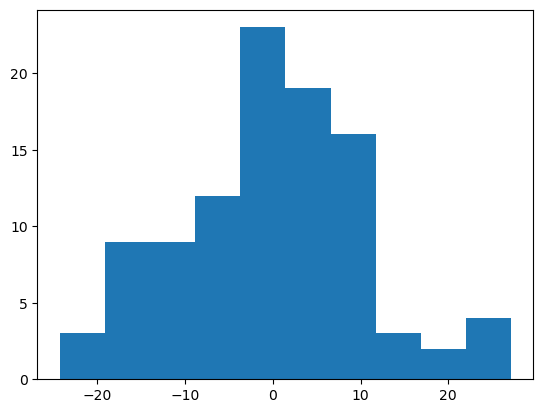

In [16]:
# Calculate residuals
df2['Residuals']= df2['y_est']- df2['y']

# Plot histogram of residuals
df2_residual_hist = plt.hist(df2['Residuals'])
df2['Residuals'].describe()

Residuals seem to be distributed normally. The prediction error ranges from -24.272 to 27.131. Residuals mean and median are close to 0. Taken together the model seems to be valid

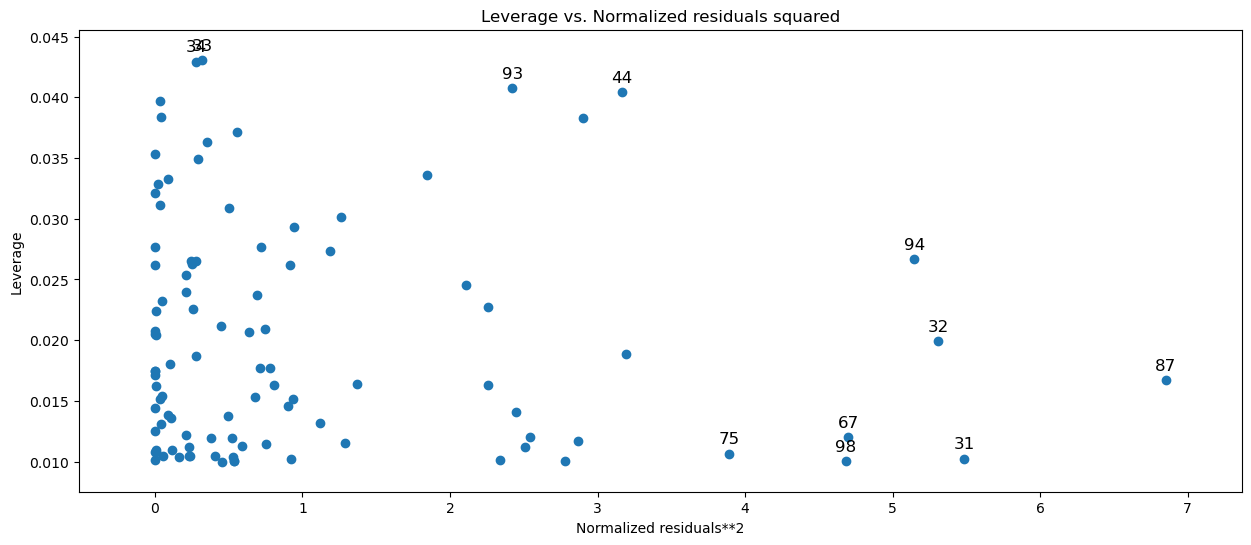

In [17]:
fig,ax = plt.subplots(figsize=(15,6))
fig = plot_leverage_resid2(df2_m, ax=ax)

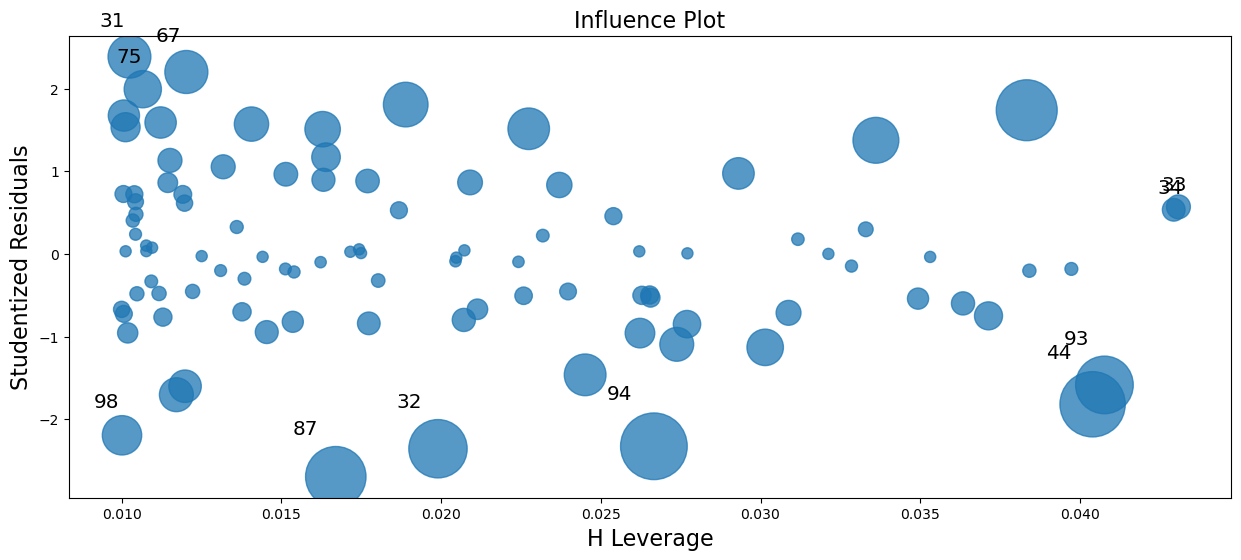

In [18]:
fig,ax = plt.subplots(figsize= (15,6))
fig = influence_plot(df2_m, ax=ax)

## Set 3

In [19]:
df3 = pd.read_excel(xls, 'Set 3')
df3.head()

,Y,x
0,6428.915770,9.517
1,2640.000728,5.113
2,12858.599267,9.773
3,5491.450053,8.428
4,2838.820108,5.752


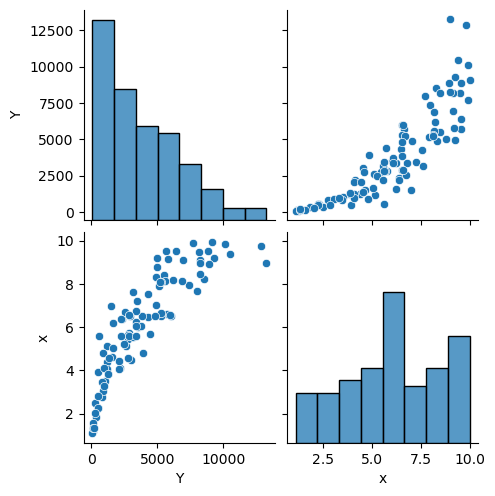

In [20]:
sns.pairplot(df3)

Y looks to be exponentially distributed, so we will transform the data

In [21]:
df3_om = sm.ols('Y~x', data = df3).fit()
df3_om.params

Intercept   -2636.174839
x            1081.826591
dtype: float64

In [22]:
df3_om.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     302.4
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           1.04e-31
Time:                        21:10:49   Log-Likelihood:                -873.07
No. Observations:                 100   AIC:                             1750.
Df Residuals:                      98   BIC:                             1755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2636.1748    402.741     -6.546      0.000   -3435.400   -1836.949
x           1081.8266     62.216     17.388      0.000     958.361    1205.292
==============================================================================
Omnibus:                       21.170   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.896
Skew:                           0.863   Prob(JB):                     5.90e-09
Kurtosis:                       5.474   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assumptions Validity for Set 3 Non transformed data
- Linearity: The R2 value of 0.755 indicates a moderately strong linear relationship between x and y.
- Normality of Residuals: Both the Omnibus and Jarque-Bera tests suggest that the residuals are not normally distributed. This indicates a potential issue with the model’s fit.
- Homoscedasticity: The results do not explicitly indicate heteroscedasticity, but the non-normal residuals may imply unequal variance.
- No Autocorrelation: The Durbin-Watson statistic being close to 2 confirms that there is no significant autocorrelation in the residuals.


In [23]:
df3['log_y'] = np.log(df3['Y'])
#del df3['Y']

In [24]:
df3

,Y,x,log_y
0,6428.915770,9.517,8.768561
1,2640.000728,5.113,7.878534
2,12858.599267,9.773,9.461768
3,5491.450053,8.428,8.610948
4,2838.820108,5.752,7.951144
...,...,...,...
95,5242.604150,8.091,8.564574
96,159.666278,1.325,5.073086
97,2087.069663,4.446,7.643516
98,206.866151,1.335,5.332072


In [25]:
#df3['log_y'] = np.log(df3['Y'])
df3_m = sm.ols('log_y~x', data = df3).fit()
df3_m.params

Intercept    5.171611
x            0.436849
dtype: float64

We have estimated the intercept to be approx 5.172 and the slope to be 0.437, thus the equation for predicting y = 5.172 + 0.437 * x

In [26]:
df3_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     519.7
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           5.82e-41
Time:                        21:10:49   Log-Likelihood:                -64.530
No. Observations:                 100   AIC:                             133.1
Df Residuals:                      98   BIC:                             138.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1716      0.124     41.690      0.000       4.925       5.418
x              0.4368      0.019     22.796      0.000       0.399       0.475
==============================================================================
Omnibus:                        3.457   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                3.160
Skew:                          -0.435   Prob(JB):                        0.206
Kurtosis:                       3.014   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assumptions Validity for Transformed Data
- Linearity: The R2 value of 0.841 indicates a strong linear relationship between x and log_y.
- Normality of Residuals: Both the Omnibus and Jarque-Bera tests indicate that the residuals are approximately normally distributed.
- Homoscedasticity: No indication of heteroscedasticity is observed based on the diagnostics.
- No Autocorrelation: The Durbin-Watson statistic being close to 2 confirms that there is no autocorrelation in the residuals.

In [27]:
intercept, slope= df3_m.params
df3['y_est'] = intercept+ slope* df3['x']

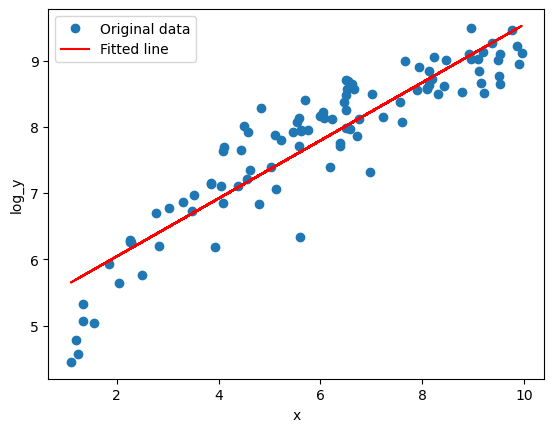

In [28]:
# Plot the estimates along with the actual observations
plt.plot(df3.x, df3.log_y, 'o', label = 'Original data')
plt.xlabel('x')
plt.ylabel('log_y')
#Plot regression line 
plt.plot(df3.x, df3.y_est, 'r-', label = 'Fitted line')
plt.legend()
plt.show()

count    1.000000e+02
mean     8.881784e-18
std      4.636569e-01
min     -9.953774e-01
25%     -3.110409e-01
50%     -2.374832e-02
75%      2.706744e-01
max      1.274040e+00
Name: Residuals, dtype: float64

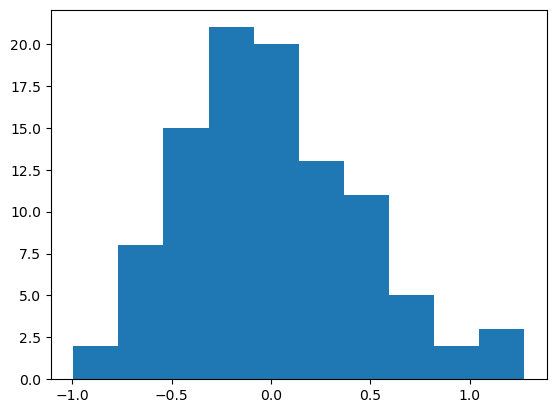

In [29]:
# Calculate residuals
df3['Residuals']= df3['y_est']- df3['log_y']

# Plot histogram of residuals

df3_residual_hist = plt.hist(df3['Residuals'])
df3['Residuals'].describe()

Residuals seem to be distributed normally. The prediction error ranges from -0.995 to 1.274. Residuals mean and median are close to 0. Taken together the model seems to be valid

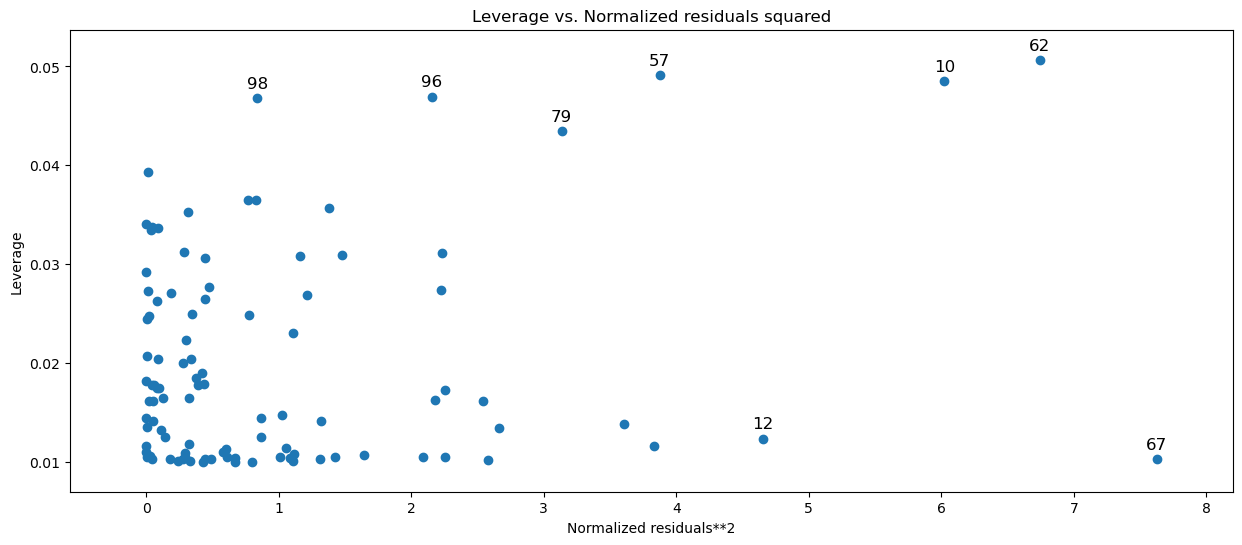

In [30]:
fig,ax = plt.subplots(figsize=(15,6))
fig = plot_leverage_resid2(df3_m, ax=ax)

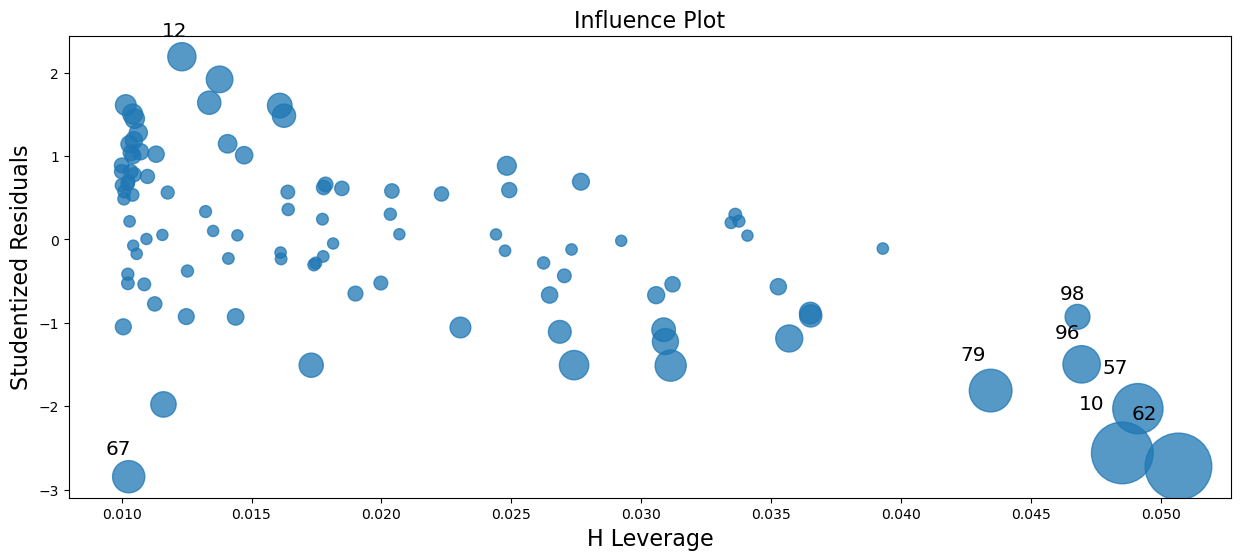

In [31]:
fig,ax = plt.subplots(figsize= (15,6))
fig = influence_plot(df3_m, ax=ax)

In Set 3, points like 67 (with high residuals) and 62 (with both high leverage and moderate residuals) could be influencing the model significantly.
Point 67 has a studentized residual close to -3, making it a potential outlier.
High leverage points, especially 10 and 62, could be influencing the regression model significantly. 

In [32]:
# Model 1: Non Transformed Data
from statsmodels.tools.eval_measures import rmse
df3_om = sm.ols('Y~x', data = df3).fit()
df3_or2 = df3_om.rsquared
df3_ormse = rmse(df3_om.fittedvalues, df3['Y'])
df3_onrmse = df3_ormse / df3['Y'].mean()

# Model 2: Transformed data
df3_m = sm.ols('log_y~x', data = df3).fit()
df3_r2 = df3_m.rsquared
df3_rmse = rmse(df3_m.fittedvalues, df3['log_y'])
df3_nrmse = df3_rmse / df3['log_y'].mean()

# Create a comparison table
comparison_df = pd.DataFrame({
    "Metric": ["R-squared", "RMSE", "NRMSE"],
    "Before Transformation": [df3_or2, df3_ormse, df3_onrmse],
    "After Transformation": [df3_r2, df3_rmse, df3_nrmse]
})

comparison_df

,Metric,Before Transformation,After Transformation
0,R-squared,0.755215,0.841337
1,RMSE,1497.765026,0.461333
2,NRMSE,0.388642,0.059203


The log transformation significantly improved the model's performance by:
- Increasing the R2 value from 0.755 to 0.841, indicating better explanatory power.
- Reducing the RMSE drastically, which suggests that the transformation helped normalize the residuals and reduced the prediction error.
- Improving the NRMSE to 0.0592, which means the model's predictions are much closer to the actual values relative to the original scale.

## Set 4

In [33]:
df4 = pd.read_excel(xls, 'Set 4')
df4.head(5)

,Y,x
0,1.887192e+05,5.9947
1,7.107264e+03,3.9492
2,3.729064e+06,9.6353
3,5.691779e+02,0.4943
4,3.022130e+06,9.0811


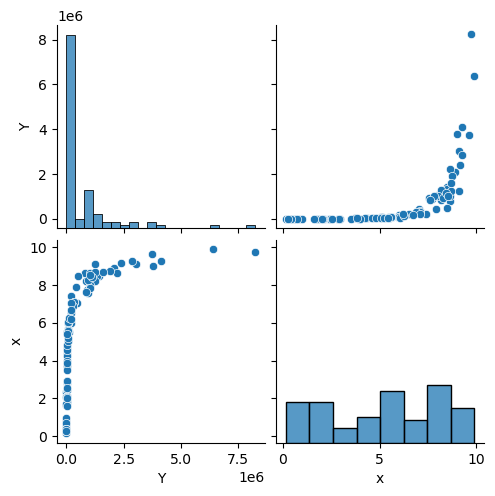

In [34]:
sns.pairplot(df4)

In [35]:
#Y looks to be exponentially distributed, so we will transform the data
df4['log_y'] = np.log(df4['Y'])
#del df4['Y']

In [36]:
# Initialize the regression model
df4_m = sm.ols('log_y~x', data = df4).fit()
df4_m.params

Intercept    5.664722
x            0.989848
dtype: float64

We have estimated the intercept to be approx 5.665 and the slope to be 0.990, thus the equation for predicting y = 5.665 + 0.990 * x

In [37]:
df4_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5765.
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           6.91e-89
Time:                        21:10:51   Log-Likelihood:                -46.034
No. Observations:                 100   AIC:                             96.07
Df Residuals:                      98   BIC:                             101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6647      0.078     72.264      0.000       5.509       5.820
x              0.9898      0.013     75.930      0.000       0.964       1.016
==============================================================================
Omnibus:                        7.020   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.256
Skew:                          -0.657   Prob(JB):                       0.0266
Kurtosis:                       2.872   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
intercept, slope = df4_m.params
df4['y_est']= intercept + slope* df4['x']

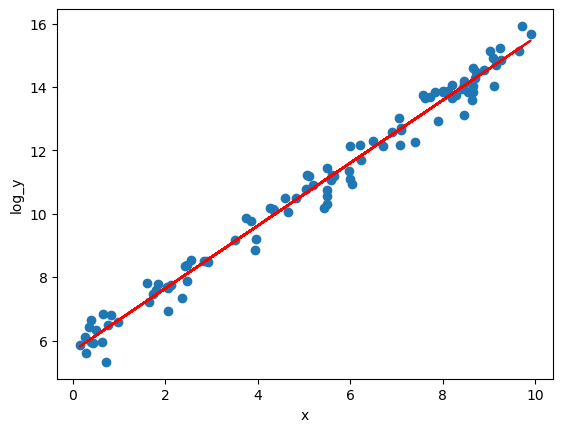

In [39]:
# Plot the estimates along with the actual observations
plt.plot(df4['x'], df4['log_y'], 'o', label = 'Original data')
plt.xlabel('x')
plt.ylabel('log_y')
# Plot regression line
plt.plot(df4['x'], df4['y_est'],'r-', label =' Fitted line')

In [40]:
# Calculate the residuals
df4['Residuals'] = df4['y_est']-df4['log_y']

count    1.000000e+02
mean    -8.615331e-16
std      3.853615e-01
min     -6.403407e-01
25%     -2.803581e-01
50%     -4.510877e-02
75%      1.901438e-01
max      1.057768e+00
Name: Residuals, dtype: float64

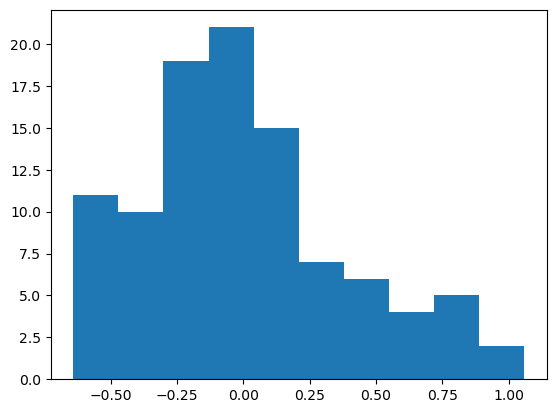

In [41]:
#Plot a histogram of the residuals
df4_res_hist = plt.hist(df4.Residuals)

df4['Residuals'].describe()

Residuals seem to be distributed normally. The prediction error ranges from -0.640 to 1.058. Residuals mean and median are close to 0. Taken together the model seems to be valid

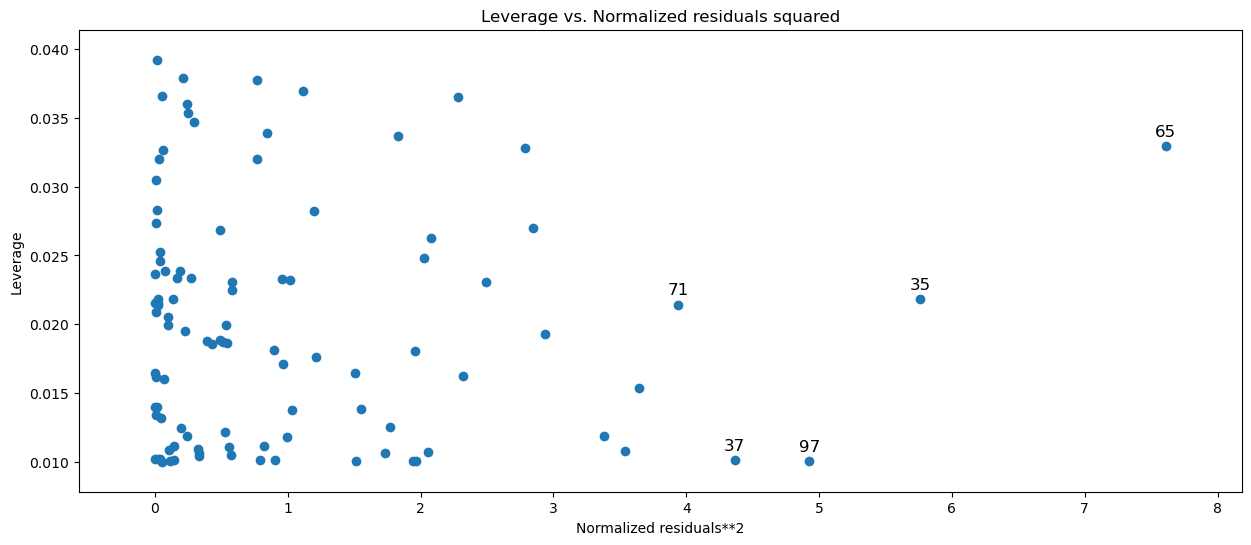

In [42]:
fig,ax = plt.subplots(figsize=(15,6))
fig = plot_leverage_resid2(df4_m, ax=ax)

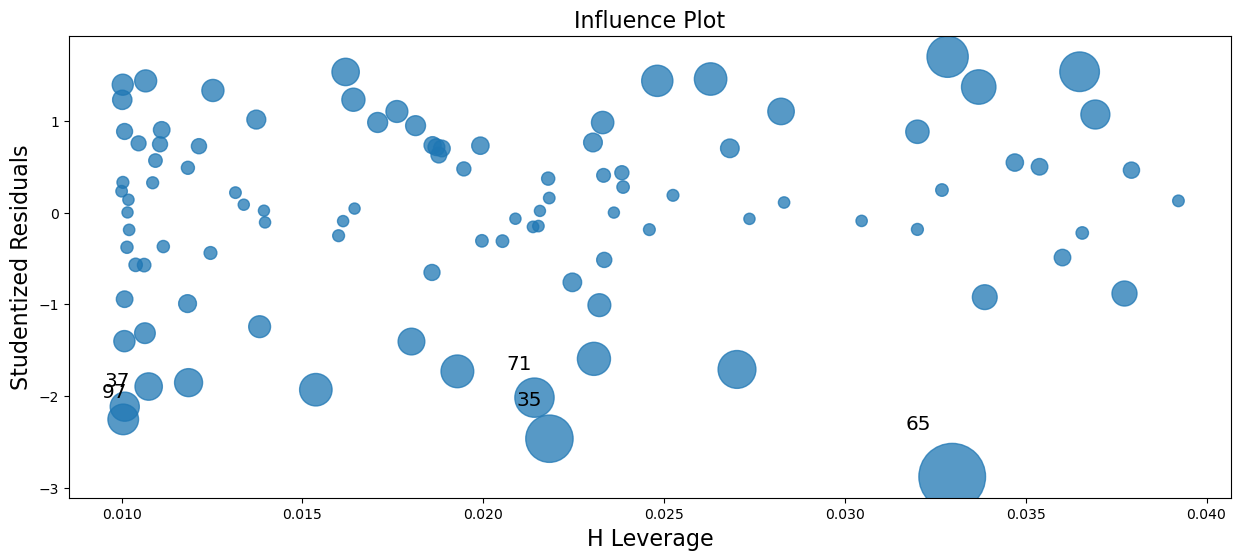

In [43]:
fig,ax = plt.subplots(figsize= (15,6))
fig = influence_plot(df4_m, ax=ax)

Points 37, 97 have studentized residuals close to -3, suggesting they may be outliers.
Point 65 has both high leverage and a relatively large residual, indicating it might be highly influential.

In [44]:
# Model 1: Non Transformed Data
from statsmodels.tools.eval_measures import rmse
df4_om = sm.ols('Y~x', data = df4).fit()
df4_or2 = df4_om.rsquared
df4_ormse = rmse(df4_om.fittedvalues, df4['Y'])
df4_onrmse = df4_ormse / df4['Y'].mean()

# Model 2: Transformed data
df4_m = sm.ols('log_y~x', data = df4).fit()
df4_r2 = df4_m.rsquared
df4_rmse = rmse(df4_m.fittedvalues, df4['log_y'])
df4_nrmse = df4_rmse / df4['log_y'].mean()

# Create a comparison table
comparison_df = pd.DataFrame({
    "Metric": ["R-squared", "RMSE", "NRMSE"],
    "Before Transformation": [df4_or2, df4_ormse, df4_onrmse],
    "After Transformation": [df4_r2, df4_rmse, df4_nrmse]
})

comparison_df

,Metric,Before Transformation,After Transformation
0,R-squared,3.796470e-01,0.983286
1,RMSE,1.027924e+06,0.383430
2,NRMSE,1.554063e+00,0.035373


The log transformation significantly improved the model's performance:
- The R2 value increased from 0.3796 to 0.9833, indicating that 98.33% of the variance in the dependent variable is now explained by the model.
- The RMSE reduced drastically 1,027,924 to 0.3834, indicating that the transformation drastically reduced the prediction error.
- The NRMSE also improved substantially, indicating that the transformed model's predictions are very close to the actual values.

## Set 5

In [45]:
df5 = pd.read_excel(xls, 'Set 5')
df5.head(5)

,Y,X
0,47.320319,9.0527
1,39.862491,7.3135
2,42.225779,8.6471
3,30.010689,5.8579
4,43.900459,7.9357


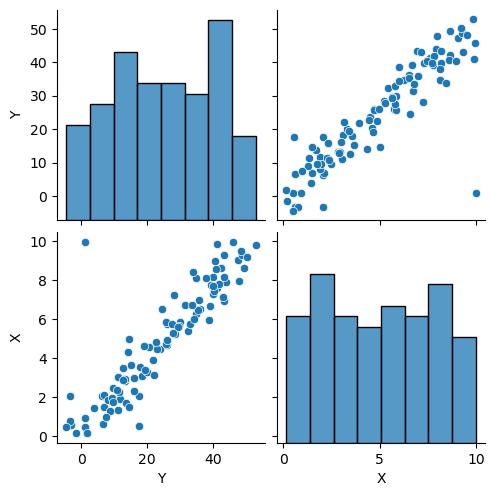

In [46]:
sns.pairplot(df5)

From the graphs in the lower left hand corner and upper right hand corner, you can see a positive correlation, so no need to transform the data

In [47]:
#  the regression model
df5_m = sm.ols('Y~X', data = df5).fit()
df5_m.params

Intercept    0.921257
X            4.767081
dtype: float64

We have estimated the intercept to be approx 0.921 and the slope to be 4.767, thus the equation for predicting y = 0.921 + 4.767 * x

In [48]:
df5_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           4.70e-37
Time:                        21:10:53   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9213      1.346      0.685      0.495      -1.749       3.591
X              4.7671      0.235     20.294      0.000       4.301       5.233
==============================================================================
Omnibus:                      113.783   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2578.951
Skew:                          -3.591   Prob(JB):                         0.00
Kurtosis:                      26.691   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
intercept, slope = df5_m.params
df5['y_est'] = intercept + slope * df5['X']

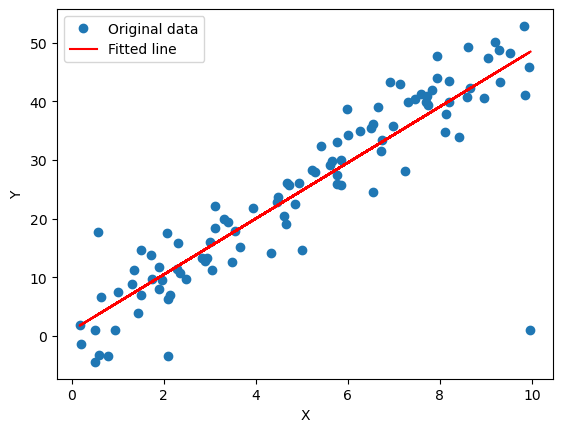

In [50]:
#Lets plot the estimates along with the actual observations
plt.plot(df5['X'], df5['Y'], 'o', label = 'Original data')
plt.xlabel('X')
plt.ylabel('Y')

# Plot regression line
plt.plot(df5['X'], df5['y_est'], 'r-', label = 'Fitted line')
plt.legend()

count    1.010000e+02
mean     1.477366e-15
std      6.666383e+00
min     -1.403782e+01
25%     -3.542946e+00
50%     -1.164350e+00
75%      2.449717e+00
max      4.742030e+01
Name: Residuals, dtype: float64

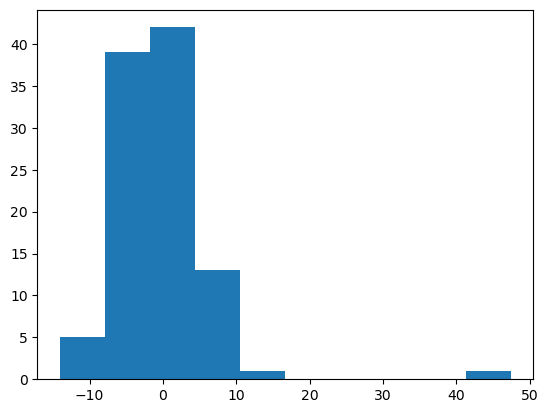

In [51]:
# Residuals
df5['Residuals'] = df5['y_est']- df5['Y']

#Plot a histogram of the residuals
df5_res_hist  = plt.hist(df5.Residuals)
df5['Residuals'].describe()

Residuals seem to be distributed normally, besides an outlier. The prediction error ranges from -14.034 to 47.421. Residuals mean and median are close to 0. Taken together the model seems to valid


In [52]:
#Let's remove the outlier and run the model again
df5.max()

Y            52.839325
X             9.970710
y_est        48.452437
Residuals    47.420297
dtype: float64

In [53]:
#Based on the above, we only want rows of data that have residuals < 47 which contains the outlier 
df5_no_outlier = df5[df5.Residuals < 47]

In [54]:
df5_no_outlier.max()

Y            52.839325
X             9.939200
y_est        48.302226
Residuals    14.231371
dtype: float64

In [55]:
#Drop columns y_est and residuals and rerun model 
del df5_no_outlier['y_est']
del df5_no_outlier['Residuals']

In [56]:
df5_no_outlier.head()

,Y,X
0,47.320319,9.0527
1,39.862491,7.3135
2,42.225779,8.6471
3,30.010689,5.8579
4,43.900459,7.9357


In [57]:
df5_m = sm.ols('Y~X', data = df5_no_outlier).fit()
df5_m.params

Intercept   -0.099290
X            5.070538
dtype: float64

The new equation for predicting y = -0.099 + 5.071 * x where before removing the outlier it was y = 0.921 + 4.767 * x, you can see that the intercept is now negative while the slope is slightly higher.

In [58]:
df5_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     945.8
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           3.84e-52
Time:                        21:10:53   Log-Likelihood:                -294.13
No. Observations:                 100   AIC:                             592.3
Df Residuals:                      98   BIC:                             597.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0993      0.935     -0.106      0.916      -1.954       1.756
X              5.0705      0.165     30.753      0.000       4.743       5.398
==============================================================================
Omnibus:                        3.022   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.760
Skew:                          -0.158   Prob(JB):                        0.252
Kurtosis:                       3.750   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
intercept, slope =df5_m.params
df5_no_outlier['y_est'] = intercept+slope* df5_no_outlier['X']

C:\Users\dhill\AppData\Local\Temp\ipykernel_3924\528628880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_no_outlier['y_est'] = intercept+slope* df5_no_outlier['X']


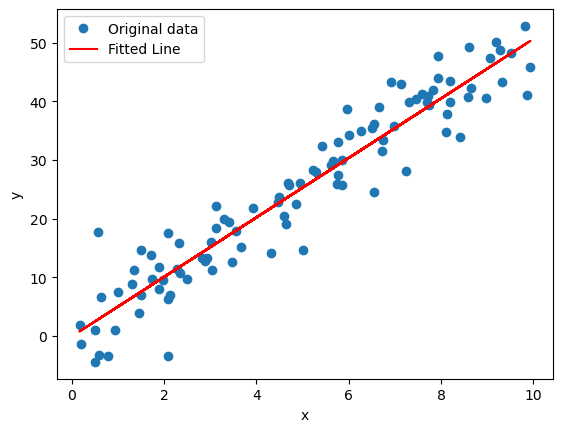

In [60]:
#Lets plot the estimates along with the actual observations
plt.plot(df5_no_outlier.X, df5_no_outlier.Y, 'o', label = 'Original data')
plt.xlabel('x')
plt.ylabel('y')


#Plot regression line 
plt.plot(df5_no_outlier.X, df5_no_outlier.y_est, 'r-', label='Fitted Line')

plt.legend()
plt.show()

C:\Users\dhill\AppData\Local\Temp\ipykernel_3924\3577849917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_no_outlier['Residuals']= df5_no_outlier['y_est']- df5_no_outlier['Y']


count    1.000000e+02
mean     2.691181e-15
std      4.605988e+00
min     -1.488861e+01
25%     -2.700744e+00
50%     -6.205125e-01
75%      2.993591e+00
max      1.384320e+01
Name: Residuals, dtype: float64

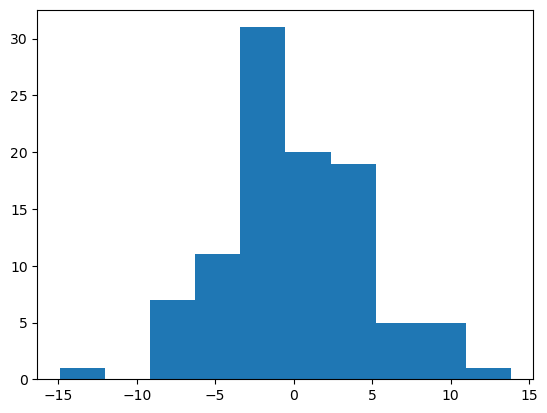

In [61]:
df5_no_outlier['Residuals']= df5_no_outlier['y_est']- df5_no_outlier['Y']

plt.hist(df5_no_outlier['Residuals'])
df5_no_outlier['Residuals'].describe()

Residuals seem to be distributed normally. The prediction error ranges from -14.88 to 13.84. Residuals mean and median are close to 0. Taken together the model seems to valid

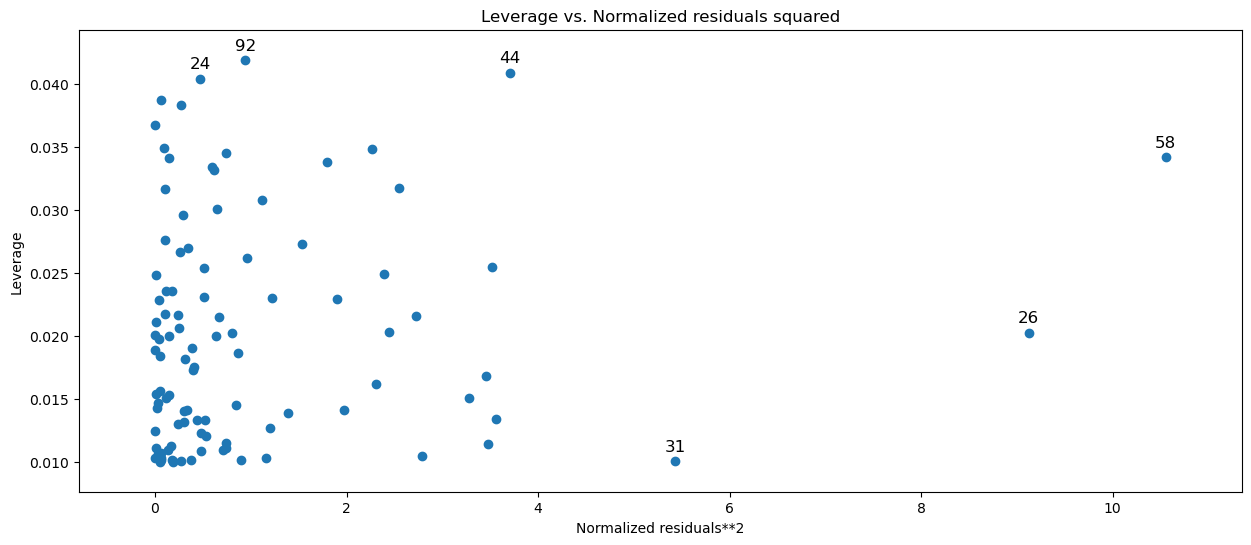

In [62]:
fig,ax = plt.subplots(figsize=(15,6))
fig = plot_leverage_resid2(df5_m, ax=ax)

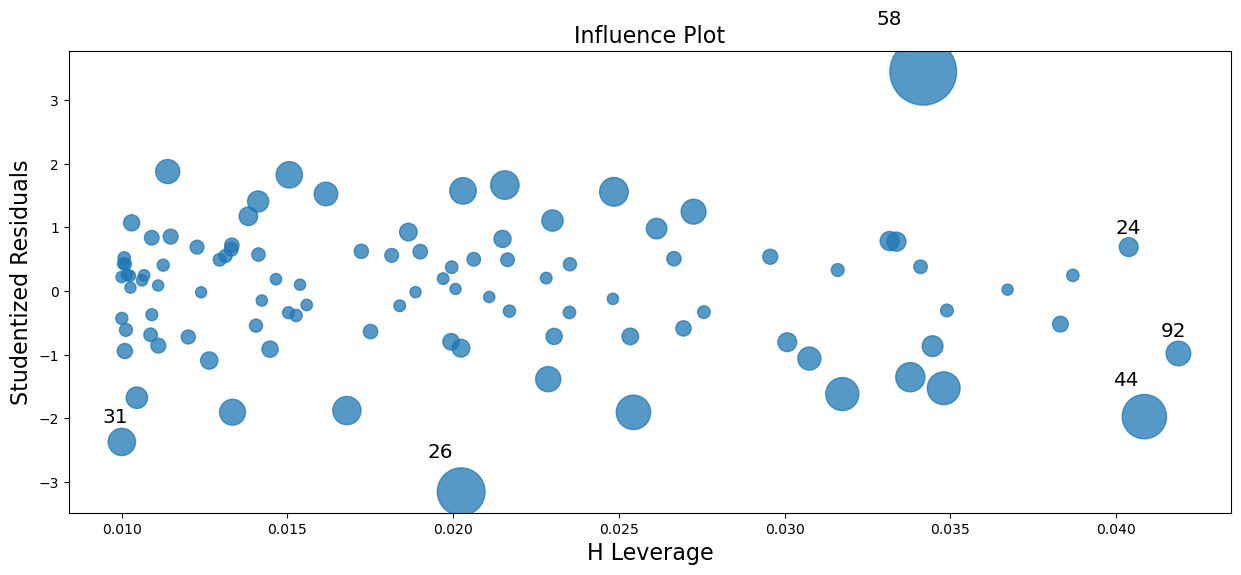

In [63]:

fig,ax = plt.subplots(figsize= (15,6))
fig = influence_plot(df5_m, ax=ax)

In [64]:
# Model 1: With Outlier Data
from statsmodels.tools.eval_measures import rmse
df5_om = sm.ols('Y~X', data = df5).fit()
df5_or2 = df5_om.rsquared
df5_ormse = rmse(df5_om.fittedvalues, df5['Y'])
df5_onrmse = df5_ormse / df5['Y'].mean()

# Model 2: Without Outlier data
df5_no_outlier = df5[df5.Residuals < 47]
df5_m = sm.ols('Y~X', data = df5_no_outlier).fit()
df5_r2 = df5_m.rsquared
df5_rmse = rmse(df5_m.fittedvalues, df5_no_outlier['Y'])
df5_nrmse = df5_rmse / df5_no_outlier['Y'].mean()

# Create a comparison table
comparison_df = pd.DataFrame({
    "Metric": ["R-squared", "RMSE", "NRMSE"],
    "With Outlier": [df5_or2, df5_ormse, df5_onrmse],
    "Without Outlier": [df5_r2, df5_rmse, df5_nrmse]
})

comparison_df

,Metric,With Outlier,Without Outlier
0,R-squared,0.806209,0.906108
1,RMSE,6.633299,4.582900
2,NRMSE,0.269201,0.184224


- R2 value of 0.8062 to 0.906108 which means 90.61% of the variance is now explained by the model.
- RMSE of 6.6333 decreases to 4.5829, showing that the transformation reduced the prediction error.
- NRMSE of 0.2692 drops to 0.1842, indicating that the error is now only about 18.42% of the mean value.

## Set 6

In [65]:
df6 = pd.read_excel(xls, 'Set 6')
df6.head(5)

,y,x
0,-2.764835,1.1290
1,61.065734,6.9100
2,52.854588,7.8374
3,-2.881062,0.1335
4,59.045448,9.2425


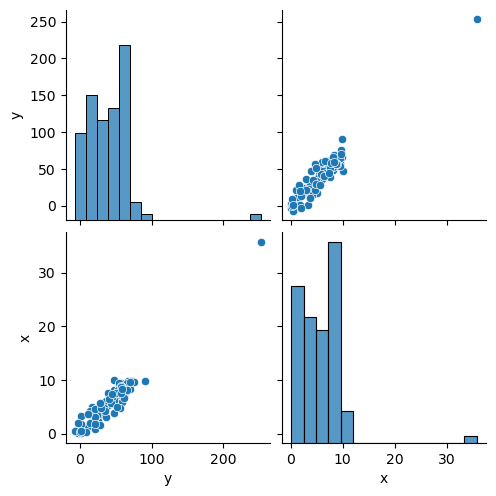

In [66]:
sns.pairplot(df6)

From the graphs in the lower left hand corner and upper right hand corner, you can see a positive correlation, besides the one very obvious outlier, so let's remove it before proceeding

In [67]:
df6.max()

y    252.837897
x     35.783400
dtype: float64

In [68]:
df6_no_outlier = df6[df6.y < 252]

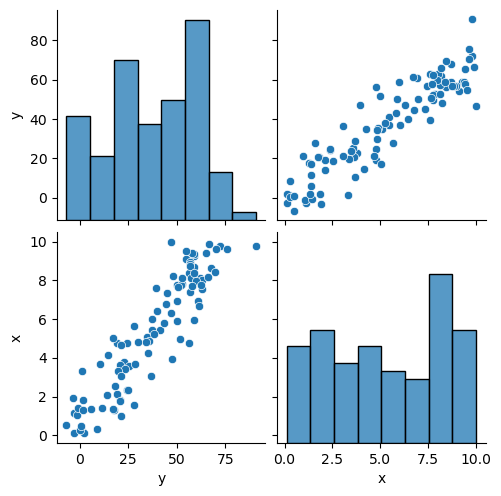

In [69]:
sns.pairplot(df6_no_outlier)

In [70]:
#Initialize the regression model 
df6_m = sm.ols('y ~ x', data = df6_no_outlier).fit()
df6_m.params

Intercept   -0.020325
x            6.970334
dtype: float64

We have estimated the intercept to be approx -0.020 and the slope to be 6.970, thus the equation for predicting y = -0.020 + 6.970 * x

In [71]:
df6_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     502.7
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           2.29e-40
Time:                        21:10:56   Log-Likelihood:                -364.34
No. Observations:                 100   AIC:                             732.7
Df Residuals:                      98   BIC:                             737.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0203      1.899     -0.011      0.991      -3.788       3.748
x              6.9703      0.311     22.420      0.000       6.353       7.587
==============================================================================
Omnibus:                        0.459   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.261
Skew:                           0.123   Prob(JB):                        0.877
Kurtosis:                       3.044   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
intercept, slope = df6_m.params
df6_no_outlier['y_est'] = intercept + slope * df6_no_outlier.x

C:\Users\dhill\AppData\Local\Temp\ipykernel_3924\826013451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6_no_outlier['y_est'] = intercept + slope * df6_no_outlier.x


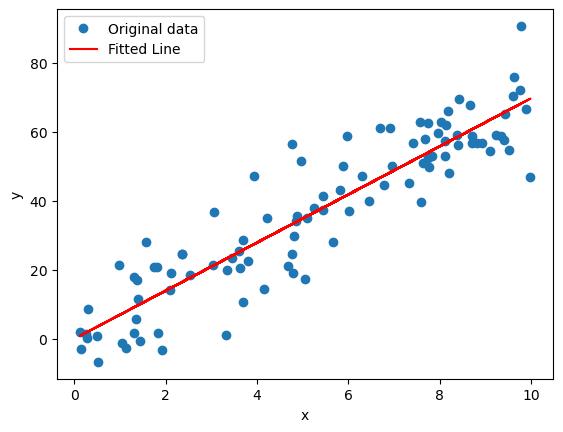

In [73]:
#Plot the estimates along with the actual observations
plt.plot(df6_no_outlier.x, df6_no_outlier.y, 'o', label = 'Original data')
plt.xlabel('x')
plt.ylabel('y')

#Plot regression line 
plt.plot(df6_no_outlier.x, df6_no_outlier.y_est, 'r-', label='Fitted Line')

plt.legend()
plt.show()

C:\Users\dhill\AppData\Local\Temp\ipykernel_3924\191682862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6_no_outlier['Residuals'] = df6_no_outlier['y_est'] - df6_no_outlier['y']


count    1.000000e+02
mean     9.769963e-16
std      9.295544e+00
min     -2.328386e+01
25%     -5.775247e+00
50%      4.739004e-01
75%      5.106210e+00
max      2.277057e+01
Name: Residuals, dtype: float64

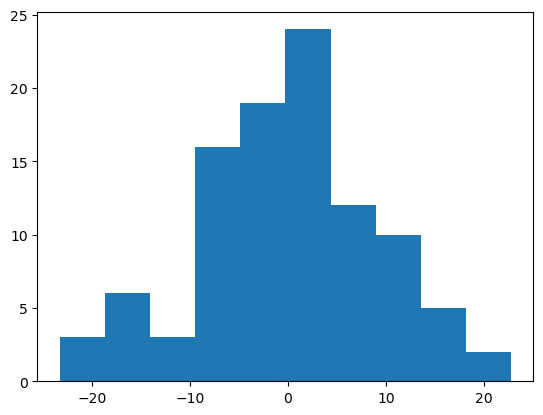

In [74]:
#Calculate the residuals
df6_no_outlier['Residuals'] = df6_no_outlier['y_est'] - df6_no_outlier['y']

#Plot a histogram of the residuals
df6_res_hist = plt.hist(df6_no_outlier.Residuals)

df6_no_outlier['Residuals'].describe()

Residuals seem to be distributed normally. The prediction error ranges from -23.284 to 22.771. Residuals mean and median are close to 0. Taken together the model seems to be valid

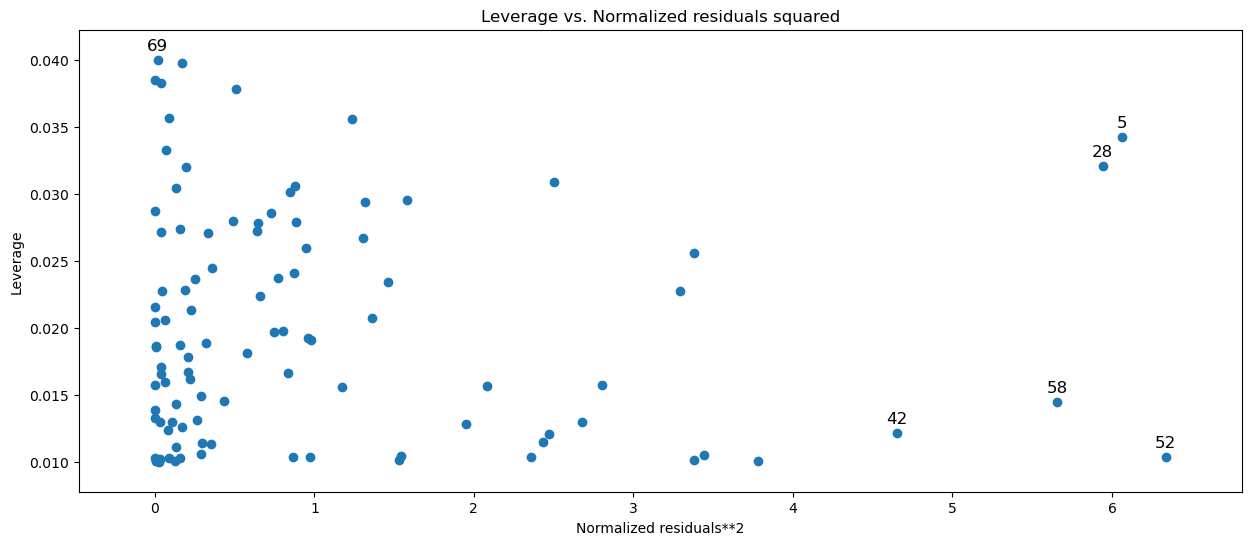

In [75]:
fig,ax = plt.subplots(figsize=(15,6))
fig = plot_leverage_resid2(df6_m, ax=ax)

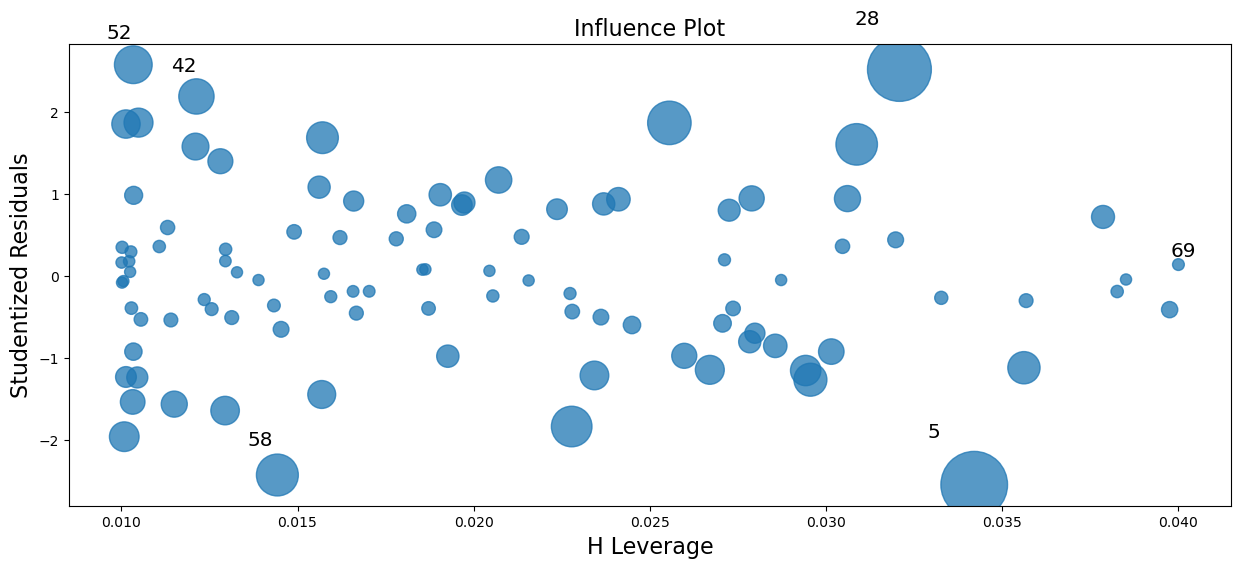

In [76]:
fig,ax = plt.subplots(figsize= (15,6))
fig = influence_plot(df6_m, ax=ax)

Points 52 and 58  are high residuals worth examining as potential outliers.
Point 5 is especially influential due to its combination of high leverage and a relatively large residual
